In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Maximum likelihood estimation (MLE)

## Motivation/Derivation

Likelihood describes "how likely is that observed data $\vec{y}$ comes from a given probability distribution ".
$$\vec{y} = \{y_1,y_2,\dots,y_n\}$$
If distribution $P(y_i;\theta) = p_\theta(y_i)$ is parametrized by $\theta$, MLE provides means to finding such $\theta^*$ that fits observed data $\vec{y}$ the best.

$$\theta^* = \argmax_\theta P(\vec{y};\theta)$$

For it we write a functional $\mathcal{L}$- a join probability of observing all data under given probability distribution. 

If we consider that data is "independent and identically distributed (i.i.d.)", which means sampling data does not change the probability distribution, then we can write $\mathcal{L}$ as a product of probability densities:
$$\mathcal{L}(\theta) = \prod_{i=1}^n p_\theta(y_i)$$

Maximization task $$\theta^* = \argmax_\theta \mathcal{L}(\theta)=\argmax_\theta \prod_{i=1}^n p_\theta(y_i)$$ implies search of extremum. If $\mathcal{L}(\theta)$ is differentiable, search for minima at $$\frac{\partial}{\partial \theta} LL(\theta)\bigg|_{\theta = \theta^*} = 0$$
and obtain closed-form solution.

***
In statistics its common to use log-probabilities due to numerical stability, synergy with gaussian distributions and simplified product rule. 
$$\log(a\cdot b) = \log a + \log b$$
We can also observe that log function is a monotonically increasing function. 

Due to this property, after transforming function $f(x)$ via $\log (f(x))$, locally, each point preserves relation of min/max with its neighbor points.

Since it holds for all points, positions of local/global minima are also preserved

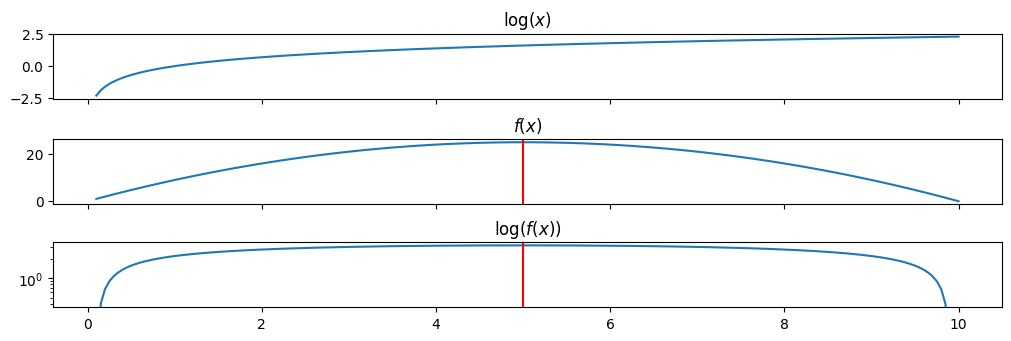

In [60]:
x = np.linspace(0.1,10, 200)
fig, ax = plt.subplots(3,1, figsize = (10,3.3), layout='constrained', sharex=True)
test_func0 = lambda x: x**2
test_func = lambda x: test_func0(5) - test_func0(x - 5) + 0.01  # shift up. cant have log of negative
ax[0].plot(x, np.log(x))            ;ax[0].set_title('$\log(x)$')
ax[1].plot(x, test_func(x))         ;ax[1].set_title('$f(x)$')      ; ax[1].axvline(5, 0,        test_func(5) , c = 'r')
ax[2].plot(x, np.log(test_func(x))) ;ax[2].set_title('$\log(f(x))$'); ax[2].axvline(5, 0, np.log(test_func(5)), c = 'r')
ax[2].set_yscale('log')

By optimizing log-likelihood $LL(\theta):=\log \mathcal{L}(\theta)$ we will obtain same minimizer(-s).
$$\argmax_\theta \mathcal{L}(\theta) = \theta^* = \argmax_\theta LL(\theta)$$
$$\theta^* = \argmax_\theta \log \left(\prod_{i=1}^n p_\theta(y_i)\right) = \argmax_\theta  \sum_{i=1}^n \log p_\theta(y_i)$$

so by differentiating and searching for roots we can find best fit parameter $\theta^*$
$$\frac{\partial}{\partial \theta} LL(\theta)\bigg|_{\theta = \theta^*} = 0$$
(Maybe) It is useful to exploit known derivative of $\log(x)$ and rewrite derivatives via chain rule 

(DID NOT USE IT. MAKES EVERYTHING HARDER)
$$\frac{\partial}{\partial \theta} LL(\theta) = 
\sum_{i=1}^n \frac{\partial \log p_\theta(y_i)}{\partial p_\theta(y_i)} \frac{\partial p_\theta(y_i)}{\partial \theta} = 
\sum_{i=1}^n\frac{1}{p_\theta(y_i)}\frac{\partial p_\theta(y_i)}{\partial \theta}$$

## Examples

from Stanford CS109 Probability for Computer Scientists I M.L.E. I 2022 I Lecture 21: https://www.youtube.com/watch?v=utFEufMXHgw


### Poisson distribution $Y_i \sim Poi(\lambda)$

Definition of distribution $(\theta \rightarrow \lambda)$:
$$p(y_i;\lambda) = \frac{e^{-\lambda} \lambda^{y_i}}{y_i!}$$
Log-likelihood:
$$LL(\theta)= \sum_{i=1}^n \log p_\theta(y_i) =  \sum_{i=1}^n \log \frac{e^{-\lambda} \lambda^{y_i}}{y_i!}$$
$$ = \sum_{i=1}^n -\lambda + y_i \log\lambda - \log y_i = - n\lambda + \sum_{i=1}^n y_i \log\lambda - \log y_i$$
Derivative:
$$\frac{\partial}{\partial \theta} LL(\lambda) = -n + \frac{1}{\lambda}\sum_{i=1}^n y_i \rightarrow 0 \bigg|_{\lambda = \lambda^*}$$
$$\lambda^* = \frac{1}{n}\sum_{i=1}^n y_i$$
Conclusion: best estimator for parameter $\lambda$ is simple mean

## Bernoulli distribution $Y_i \sim Ber(p)$

$$p(y_i;p) = \begin{cases}
			p, & \text{if $y_i = 1$}\\
            1-p, & \text{if $y_i = 0$}
		 \end{cases}$$
		
Notice that log-like is not differentiable. But we can construct a continuous function that provides same probabilities of discrete values at $y_i \in \{0,1\}$

We replace it with
$$p(y_i;p) = p^{y_i}(1- p)^{1-y_i}$$
and we see that 
$$p(y_i = 0;p) =  p^0(1- p)^{1-0} = 1- p$$
and 
$$p(y_i = 1;p) = p^1(1- p)^{1-1} = p$$

$$LL(p) = \sum_{i=1}^n \log  p^{y_i}(1- p)^{1-y_i} = \sum_{i=1}^n \left[y_i \log p + (1-y_i) \log (1-p)\right]$$

$$\frac{\partial}{\partial \theta} LL(p) = \sum_{i=1}^n \left[ \frac{y_i}{p} - (1-y_i)  \frac{1}{1-p}\right]  = \frac{1}{p} \sum_{i=1}^n y_i - \frac{1}{1-p}\sum_{i=1}^n 1 + \frac{1}{1-p}\sum_{i=1}^n y_i$$
$$\frac{\partial}{\partial \theta} LL(p) = \bigg| Y = \sum_{i=1}^n y_i \bigg|= \frac{Y}{p} + \frac{Y}{1-p} -  \frac{n}{1-p} \rightarrow 0 \bigg|_{p = p^*}$$
$$\frac{Y}{p^*} + \frac{Y-n}{1-p^*} = 0 $$
$$\frac{p^* - 1}{p^*} = \frac{Y-n}{Y} $$
$$\frac{p^*}{p^*} -\frac{1}{p^*} =  1 -\frac{1}{p^*} = \frac{Y-n}{Y} $$
$$ 1 - \frac{Y-n}{Y} = \frac{1}{p^*}$$
$$ \frac{Y}{Y} - \frac{Y-n}{Y} = \frac{Y - Y +n}{Y}= \frac{n}{Y}=  \frac{1}{p^*}$$
$$p^* = \frac{Y}{n} = \frac{1}{n}\sum_{i=1}^n y_i$$

Conclusion: best estimator for parameter $p$ is simple mean!

## Normal distribution $Y_i \sim \mathcal{N}(\vec{\theta}) = \mathcal{N}(\sigma^2, \mu)$

from [Gaussian_Properties.ipynb](Gaussian_Properties.ipynb)

$$p(y_i, \sigma^2; \mu) = \frac{1}{\sigma\sqrt{2\pi}} 
  \exp\left( -\frac{1}{2}\left(\frac{y_i-\mu}{\sigma}\right)^{\!2}\,\right)$$

and 
$$LL(\sigma^2;\mu, \vec{y}) = -\frac{1}{2}\left( n\log 2\pi + 2 n \log \sigma +\frac{\sum_{i = 1}^N \left(x_i-\mu\right)^2}{\sigma^2}\right)$$

Since there are two parameters, we are searching for a gradient of zero $$\nabla_{\{\sigma, \mu\}} LL(\sigma^2;\mu, \vec{y}) = 0 $$
which means 
$$\frac{\partial}{\partial \sigma} LL(\sigma^2;\mu, \vec{y}) = \frac{\partial}{\partial \mu} LL(\sigma^2;\mu, \vec{y})= 0$$


$$\frac{\partial}{\partial \sigma} LL(\sigma^2;\mu, \vec{y}) = -\frac{n}{\sigma} + \sum_{i = 1}^n \left(y_i-\mu\right)^2 \frac{1}{\sigma^3}\rightarrow 0 \bigg|_{\sigma = \sigma^*}$$
$${\sigma^*}^2 = \frac{1}{n}\sum_{i = 1}^n\left( y_i-\mu\right)^2 $$
Which is biased sample variance, which differs from $\frac{1}{n-1}\sum_{i = 1}^n\left( y_i-\mu\right)^2$ which employs https://en.wikipedia.org/wiki/Bessel%27s_correction

$$\frac{\partial}{\partial \mu} LL(\sigma^2;\mu, \vec{y}) = - \frac{1}{2 \sigma^2} 2 \sum_{i = 1}^n\left( y_i-\mu\right) (-1)\rightarrow 0 \bigg|_{\mu = \mu^*}$$
$$\frac{1}{\sigma^2}  \sum_{i = 1}^n\left( y_i-\mu^*\right) = 0 $$
$$  \sum_{i = 1}^n\left( y_i-\mu^*\right) = \sum_{i = 1}^n y_i - n \mu^* = 0$$
$$\mu^* = \frac{1}{n} \sum_{i = 1}^n y_i$$